# Chapter 2: Simple Linear Regression excercise

In [1]:
%reset
low_memory=False

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## 2.1 Introduction & Motivation

Now that you have learned about linear regression, how to use it and how to evaluate, it's time to put this into practice!
We will be looking at a dataset containing data about advertisement budget and sales. We will be trying to see if there are any correlations and if we can predict these.

## 2.2 Problem setting

A company called Contoso is spending a certain amount of budget on advertising each month. They are keeping all this data in a single dataset which displays sales (in thousands of units) for a particular product as well as advertising budgets (in thousands of dollars) for TV, radio, and newspaper media that month.

## 2.3 Model

Go to canvas and donload the file "Advertising.csv" from module 2. This data contains the required dataset.

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


##### Question 1: Have a look at the columns and data of this dataset. What variables would you want to predict? What variables would you like to base your prediction on?

##### Question 2: Without plotting the data on a graph, think about the real-life facts behind this data. Would you expect logistical regression make sense for the required predictions? Why (not)?

Before we train this new model, we first want to create a column where all our information is stored. We will call this column 'total_spent'.

Since we are working with an actual dataset, we also want to split our data. in a train and a test set. This ensure we can properly evaluate our model and test in on data it has never seen before.

In [3]:
df['total_spent'] = df['TV'] + df['radio'] + df['newspaper']

X = df['total_spent'].to_numpy().reshape(-1, 1)
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##### Question 3: Notice the two parameters called "test_size" and "random_state". "test_size" is required while "random_state" is an optional parameter. Read the sklearn documentation to know more about them. What do these variables mean? Are there any contraineds on them or can you put whatever you want? What would happen if you change the numers? What would happen if you drop the "random_state" parameter? Can you think of any scenario's where you would do so?

Now that you have prepared your data it's time to train the model. Make sure to only use the training data!

In [5]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

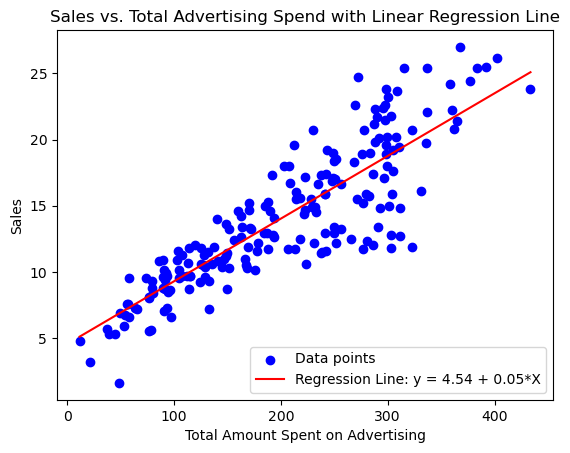

In [6]:
beta_0 =model.intercept_
beta_1 = model.coef_[0]
x_vals = np.linspace(X.min(),X.max(),100)
y_vals = beta_0 + beta_1 *x_vals
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(x_vals, y_vals, color='red', label=f'Regression Line: y = {beta_0:.2f} + {beta_1:.2f}*X')
plt.xlabel('Total Amount Spent on Advertising')
plt.ylabel('Sales')
plt.title('Sales vs. Total Advertising Spend with Linear Regression Line')
plt.legend()

##### Question 4:  Plot a graph to show the amount of sales in function of the total amount spent on advertising. Draw a line using Beta 0 and Beta 1 to show our model. Does this confirm/deny your earlier assumptions about whether or not to choose linear regression?

In [7]:
plt.show()

## 2.4 Model Evaluation

Now it's time to evaluate this model! To do so, calculate the $R^2$ value of our model.

##### Question 5: Interpret the $R^2$ score. Is our model any good?

In [8]:
y_pred = model.predict(X_test)
mse =mean_squared_error(y_test, y_pred)
r2 =r2_score(y_test, y_pred)
print(f"R2 squre: {r2}")

R2 squre: 0.7902512827490803


The $R^2$ value is not the only value that evaluates our model. Another interesting value to look at is the $MSE$.

##### Question 6: Calculate the MSE. Remember that we kept some test data on the side exactly for this purpose!

In [9]:
print(f"Mean squre error: {mse}")


Mean squre error: 5.92166016091218


##### Question 7: Calculate the MSE but this time on training data. Compare both values. Is this what you would expect? Can you explain the result?

In [10]:
red=model.predict(X_train)
mse2=mean_squared_error(y_train,red)
print(f"Mean squre error(train data):{mse2} ")

Mean squre error(train data):7.045187801076913 


## 2.5 Exercises

##### Question 1: See section 2.3
##### Question 2: See section 2.3
##### Question 3: See section 2.3
##### Question 4: See section 2.3
##### Question 5: See section 2.4
##### Question 6: See section 2.4
##### Question 7: See section 2.4
##### Question 8: Our next ad campaign will have a total spend of 236k on advertisement, how many units could we expect to sell as a result of this?**
##### Question 9: In our current model we have created a new table for the total amount of advertisement. However, it is likely that The seperate budget columns have a different influence on our model. Create a model for each budget column and compare their performance using $R^2$ and the MSE on test data. What do you notice?
##### Question 10: WHen we calculate the total budget, we technically have all the data in one column. However, it might be possible that there is extra value to gain when keeping the columns seperate. Build a single model with three distinct features (TV, Radio and Newspaper). Plot the model and evaluate it using $R^2$. Is this an improvement? Test the model on test data and calculate the MSE. Compare this to our current model. Is there an improvement here?
##### Question 11: Show the coefficients of the newly trained models. How many are there? Why is this? Plot the function using Beta 0 and Beta 1 on a graph using 'model.predict'. Can you explain the results? How would you merge this into a single function?
##### Question 12: Our next ad campaign will have a total spend of 149k on TV, 22k on Radio, and 12k on Newspaper Ads, how many units could we expect to sell as a result of this?

# 8 Answer::

In [13]:

def predictY(x):
    return model.intercept_ +model.coef_[0] * x
print(f"Expected unit: {predictY(236)}")



Expected unit: 15.724592725162267


# 9 Answer::

In [14]:

features = ['TV','radio','newspaper']
results ={}
for feature in features:
    X =df[[feature]]
    y =df['sales']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mse =mean_squared_error(y_test, y_pred)
    r2 =r2_score(y_test, y_pred)
    results[feature] = {'MSE': mse, 'R²': r2}
    
for feature, metrics in results.items():
    print(f"Model for {feature}.")
    print(f" MSE: {metrics['MSE']:.2f}")
    print(f"  R²: {metrics['R²']:.2f}") 
    print("\n")

Model for TV.
 MSE: 10.32
  R²: 0.63


Model for radio.
 MSE: 20.61
  R²: 0.27


Model for newspaper.
 MSE: 28.44
  R²: -0.01




# 10 Answer:

Model with TV, Radio, and Newspaper features:
  MSE: 2.30
  R²: 0.92


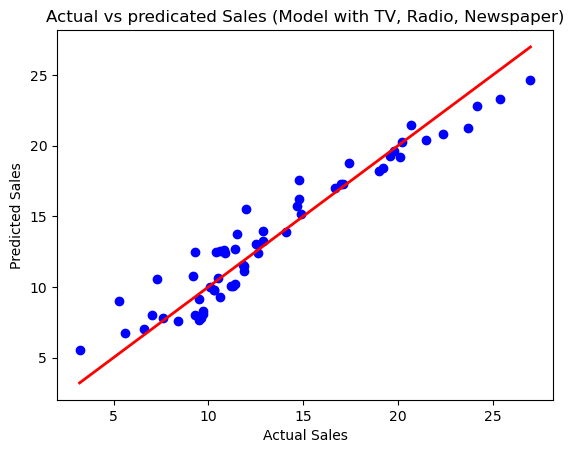

In [16]:

X = df[['TV', 'radio', 'newspaper']]
y = df['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model with TV, Radio, and Newspaper features:")
print(f"  MSE: {mse:.2f}")
print(f"  R²: {r2:.2f}")

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()],color='red',linewidth=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs predicated Sales (Model with TV, Radio, Newspaper)')
plt.show()

# 11 Answer:::

Intercept (Beta 0): 3.15
Coefficient for TV (Beta 1): 0.04
Coefficient for radio (Beta 2): 0.19
Coefficient for newspaper (Beta 3): -0.00

Number of coefficients: 3


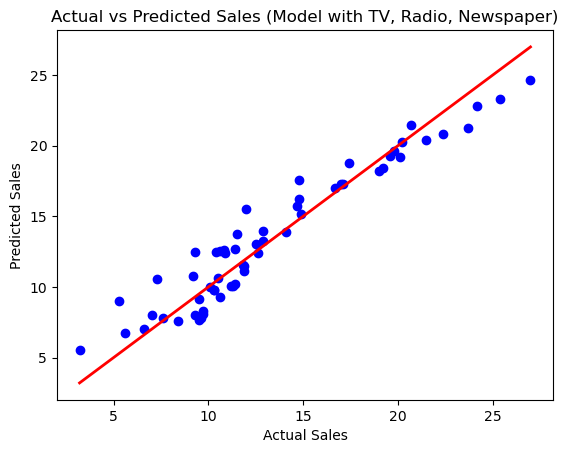

In [17]:

coefficients = model.coef_
intercept = model.intercept_

print(f"Intercept (Beta 0): {intercept:.2f}")
for i, feature in enumerate(X.columns):
    print(f"Coefficient for {feature} (Beta {i+1}): {coefficients[i]:.2f}")


print(f"\nNumber of coefficients: {len(coefficients)}")
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Model with TV, Radio, Newspaper)')
plt.show()

# Explanation:
1. Intercept (Beta 0) and Coefficients (Beta 1, Beta 2, Beta 3):
Intercept (Beta 0): This is the constant term of the linear equation. It represents the predicted sales when all the features (TV, radio, and newspaper budgets) are zero.
Coefficients (Beta 1, Beta 2, Beta 3): These represent the weight or impact of each feature on the predicted sales. For example, Beta 1 is the coefficient for TV, Beta 2 for radio, and Beta 3 for newspaper.
2. Number of Coefficients:
There are three coefficients because we have three distinct features (TV, radio, and newspaper). Each feature has its own coefficient, which indicates its individual contribution to the prediction.
3. Plotting the Predictions:
The plot shows the actual sales values on the x-axis and the predicted sales values on the y-axis. The red line represents the ideal situation where actual sales are equal to predicted sales. If the points cluster closely around this line, the model is performing well.
How Would You Merge This into a Single Function?
A single function would combine the impact of all features into one linear equation. The equation for a linear regression model with multiple features is:

sales
=
𝛽
0
+
𝛽
1
⋅
TV
+
𝛽
2
⋅
radio
+
𝛽
3
⋅
newspaper
sales=β 
0
​
 +β 
1
​
 ⋅TV+β 
2
​
 ⋅radio+β 
3
​
 ⋅newspaper
This is already a single function that accounts for multiple features. If you wanted to merge all the columns into one, you could create a new feature that combines all budgets, as you did previously with df['total_spent']. However, separating them allows the model to weigh the influence of each budget differently.

# Explain the Results:
Interpretation of Coefficients: Each coefficient explains how much the predicted sales increase or decrease for a one-unit change in that feature (e.g., $1 spent on TV, radio, or newspaper ads) while holding the other features constant.
Impact of Merging Features: Merging all features into one column (as done earlier) would lose the individual influence of each feature. The model would no longer be able to differentiate between the impact of TV vs. radio vs. newspaper.
Why Keep the Features Separate?
Separating the features allows you to see how each advertising channel affects sales individually. For instance, TV might have a stronger influence on sales compared to newspaper ads, and separating the features lets the model learn this.

# 12 Answer::

In [18]:
new_campaign = pd.DataFrame([[149, 22, 12]], columns=['TV', 'radio', 'newspaper'])
predicted_sales = model.predict(new_campaign)
print(f"Predicated sales for the new ad campaign: {predicted_sales[0]:.2f} units")

Predicated sales for the new ad campaign: 13.93 units


##  Explanation:
We create an array with the values 149 (TV), 22 (radio), and 12 (newspaper) representing the ad spend.
The model is used to predict the sales based on these values.